In [1]:
# Implementing DFT in Python 
import numpy as np
import matplotlib.pyplot as plt

def DFT(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)  # Output array (complex numbers)

    for k in range(N):  # Loop over frequency bins
        for n in range(N):  # Loop over time samples
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    
    return X


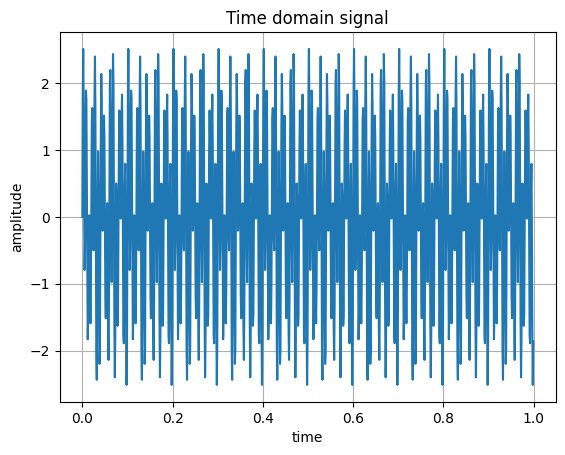

In [2]:
# Create a sample signal (two sine waves)
Fs = 1000  # Sampling rate
T = 1 / Fs  # Sampling interval or time step (1 ms per sample).
t = np.linspace(0, 1, Fs, endpoint=False)  # 1 second duration 
# Creates a time vector t with 1000 points, representing time steps from 0 to 0.999 seconds.

# Signal: Combination of 50 Hz and 120 Hz sine waves
f1, f2, f3 = 50, 120, 150
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)+ 1.5 * np.sin(2 * np.pi * f3 * t)

plt.plot(t,signal)  # Single-sided spectrum
plt.title("Time domain signal")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.grid()
plt.show()

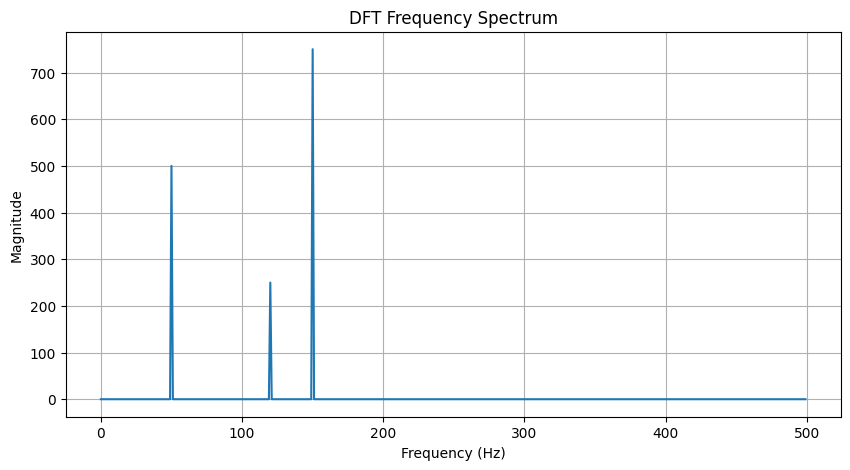

In [3]:
# Compute DFT
dft_output = DFT(signal)

# Compute frequency bins
freqs = np.fft.fftfreq(len(dft_output), T) #Fast Fourier Transform (FFT) (a faster version of DFT)

# Plot magnitude spectrum (single-sided)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:Fs//2], np.abs(dft_output[:Fs//2]))  # Single-sided spectrum
# np.abs(dft_output[:Fs//2]): Computes the magnitude of the complex DFT output.

# Why [:Fs//2] is Used in FFT?
# The Fourier Transform (FFT) gives both positive and negative frequencies (symmetric output).
# In real-world signals, we only care about positive frequencies.
# The first Fs//2 values contain the positive frequencies, while the second half is just a mirror image.
# This is why we plot only the first half of the frequency spectrum.

plt.title("DFT Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [4]:
# Compute Frequency Bins Using NumPy
# Instead of computing manually, NumPy provides a built-in function np.fft.fftfreq(), which calculates the bins directly.
# python
# CopyEdit
import numpy as np

N = 1024   # Number of points in DFT
Fs = 1000  # Sampling frequency

# Compute frequency bins using NumPy
freq_bins = np.fft.fftfreq(N, d=1/Fs)

print(freq_bins[:10])  # Print first 10 frequency bins

[0.        0.9765625 1.953125  2.9296875 3.90625   4.8828125 5.859375
 6.8359375 7.8125    8.7890625]


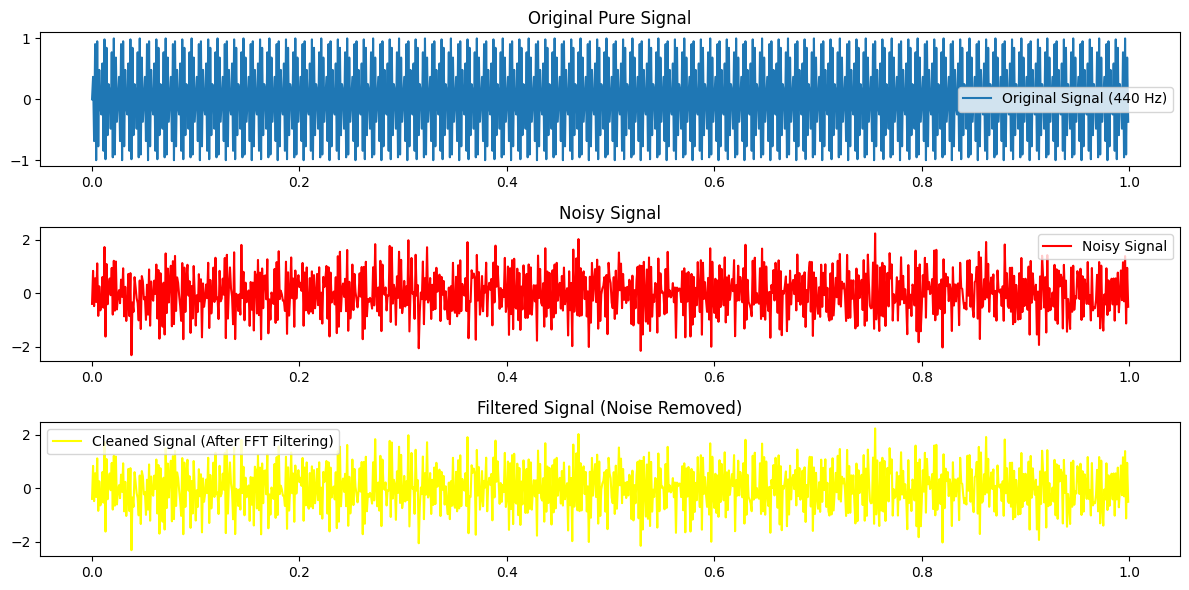

In [5]:
# Example: Removing Noise from an Audio Signal
# We'll generate a noisy audio signal, apply FFT, filter out high-frequency noise, and reconstruct the cleaned signal using Inverse FFT.
#  Steps:
# 1.	Generate an audio signal (a pure sine wave of 440 Hz).
# 2.	Add random noise.
# 3.	Apply FFT to transform the signal to the frequency domain.
# 4.	Remove noise by filtering high frequencies.
# 5.	Apply Inverse FFT to get back the cleaned signal.
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Generate a sample audio signal
Fs = 1000  # Sampling rate (1000 Hz)
T = 1 / Fs  # Sampling interval
t = np.linspace(0, 1, Fs, endpoint=False)  # 1 second time vector

# Generate a pure sine wave (440 Hz, like an "A4" musical note)
freq_signal = 440
pure_signal = np.sin(2 * np.pi * freq_signal * t)

# Add random noise
noise = np.random.normal(0, 0.5, pure_signal.shape)
noisy_signal = pure_signal + noise

# Apply FFT
fft_signal = fft(noisy_signal)
freqs = fftfreq(len(fft_signal), T)  # Frequency bins

# Filter: Remove frequencies higher than 500 Hz
fft_filtered = fft_signal.copy()
fft_filtered[np.abs(freqs) > 500] = 0  # Zero out high frequencies (noise)

# Apply Inverse FFT to get the cleaned signal
cleaned_signal = ifft(fft_filtered).real

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, pure_signal, label="Original Signal (440 Hz)")
plt.legend()
plt.title("Original Pure Signal")

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label="Noisy Signal", color="red")
plt.legend()
plt.title("Noisy Signal")

plt.subplot(3, 1, 3)
plt.plot(t, cleaned_signal, label="Cleaned Signal (After FFT Filtering)", color="yellow")
plt.legend()
plt.title("Filtered Signal (Noise Removed)")

plt.tight_layout()
plt.show()

# FT,IFT,DFT,IDFT
# name 
# theory
# input
# output
# purpose